# User Rating Analysis 

### User rating variation with number of votes

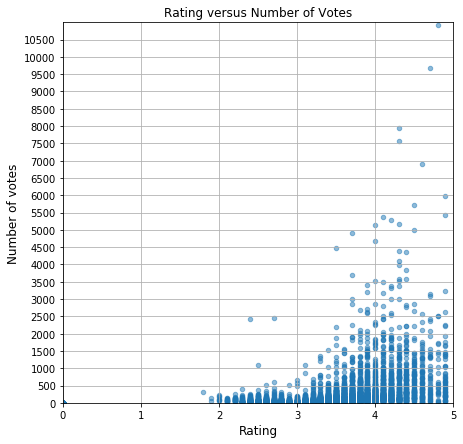

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_csv('datasets/zomato.csv', encoding='ISO-8859-1')
df=data.copy()
#i didn't do anything much. just plotted the graph
plt.figure(figsize=(7, 7))
plt.scatter(df['Aggregate rating'], df['Votes'], s=20, alpha=0.5)
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating', size=12)
plt.ylabel('Number of votes', size=12)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()

The common trend in the above graph is as the number of votes increases the chances of getting higher ratings also increases. 
It is clear from the graph that any restaurants with more than 5000 votes get ratings between 4 and 5. 
when the votes are less than 2000, there is a diversity of ratings, which varies from 2 to 5. 
For a restaurant to have a probability of getting higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

### User rating variation with number of cuisines served

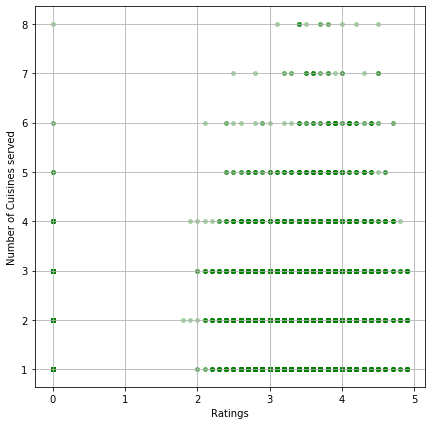

| number of cuisines served=  3 | number of restaurants serving given number of cuisines=  1840  |
| number of cuisines served=  1 | number of restaurants serving given number of cuisines=  3394  |
| number of cuisines served=  4 | number of restaurants serving given number of cuisines=  584  |
| number of cuisines served=  2 | number of restaurants serving given number of cuisines=  3444  |
| number of cuisines served=  5 | number of restaurants serving given number of cuisines=  164  |
| number of cuisines served=  6 | number of restaurants serving given number of cuisines=  74  |
| number of cuisines served=  7 | number of restaurants serving given number of cuisines=  28  |
| number of cuisines served=  8 | number of restaurants serving given number of cuisines=  14  |


In [11]:
df=df.loc[df.Cuisines.notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]
rating=[i for i in df['Aggregate rating']]
plt.figure(figsize=(7, 7))
plt.scatter(rating, cuisines, c='green', s=15, alpha=0.3)
plt.xlabel('Ratings')
plt.ylabel('Number of Cuisines served')
plt.grid()
plt.show()
dic=dict()
for i in cuisines:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
for i in dic.keys():
    print("| number of cuisines served= ", i, "| number of restaurants serving given number of cuisines= ", dic[i]," |")

The common trend, it is clear that when the number of cuisines provided increases from 3 to 8, generally the rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely to get higher ratings, specially when the number of cuisines provided exceeds 6. while if the restaurants provide less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. it seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. while restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

### User rating variation with average cost of the restaurant

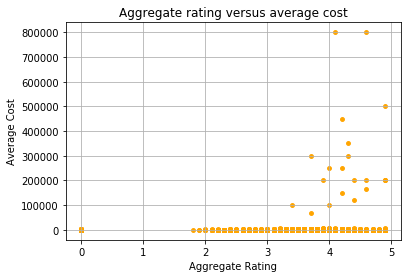

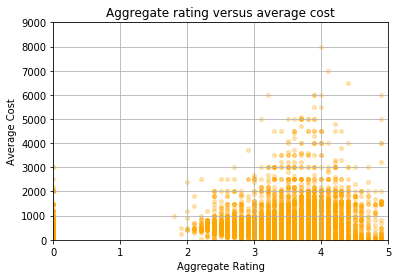

In [15]:
df=data.copy()
# plt.figure(figsize=(7, 7))

plt.subplots(0, 1)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange')
plt.grid()
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost')
plt.title('Aggregate rating versus average cost')
plt.show()


plt.subplots(0, 2)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange', alpha=0.3)
plt.grid()
plt.axis([0, 5, 0, 9000])
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost')
plt.title('Aggregate rating versus average cost')
plt.show()

In the first subplot we can see that when the average cost goes higher than 1 lakh the rating is generally between 4 and 5, and ofcourse it sholud be like that only, because when the average cost is too high itself, the food quality should also be at its peak.This subplot dosen't give us much details about the variation of rating with the average cost. The second subplot is made by narrowing the range of average cost for two.As the average cost goes in between 2000, to 6000, it seems like the food is not worth the money because in that case the average rating is generally between 3 and 4. whereas when the average cost is between 1000 to 2000, the rating varies from 3 to 4.5 mostly. But for the higher price ranges the rating is between 3 and 4.

### aggregate user rating variation with restaurants serving some specific cuisines.

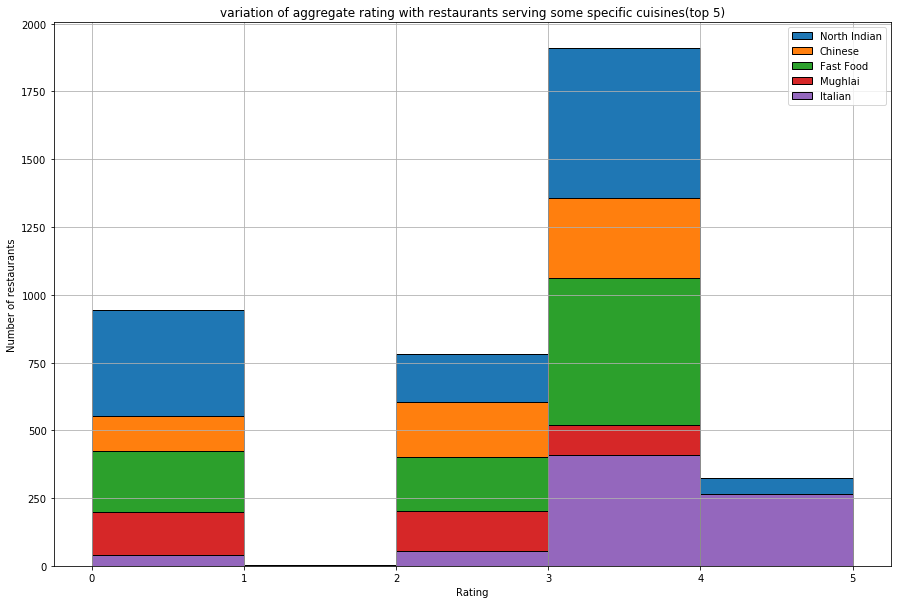

In [18]:
df=data.copy()
df=df.loc[df.Cuisines.notnull()]
cuisines=[]
for i in df.Cuisines:
    for j in i.split(','):
        cuisines.append(j)
dic=dict()
for i in cuisines:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
cus=np.array([i for i in dic.keys()])
freq=np.array([i for i in dic.values()])

cus=cus[np.argsort(freq)][::-1]
freq=freq[np.argsort(freq)][::-1]
popular_cuisines=cus[:5]
plt.figure(figsize=(15, 10))
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating')
    plt.ylabel('Number of restaurants')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()

From the above histrogram plot, it is clear that North indian cuisinie is the best rated among all the cuisinies in all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.after these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a considerable rating between 3 to 4 and 4 to 5 also.

### Weighted Restaurant Rating

In [21]:
df=data.copy()
np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
        #here i have just applied the complete formula to calculate Weighted restaurant rating  in each locality
        #here i is the locality name and this leanthy term is the formula for calculating  WRR.
        #sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0] here [0] at the last is used because the result i will get from sum((np_votes*np_rating)[np.argwhere(np_locality==i)]) is an array with one number. thats why i have indexed it to get that number.
        #same is the case with sum(np_votes[np.argwhere(np_locality==i)])[0]
np_local=np.array([i for i in dic.keys()])#numpy array of locality
np_wrr=np.array([i for i in dic.values()])#weighted restaurant rating
np_local=np_local[np.argsort(np_wrr)][::-1]#arranged in descending order
np_wrr=np.sort(np_wrr)[::-1]#arranged in desceding order
for i in range(len(np_wrr)):
    print(np_local[i], "\t| ", np_wrr[i]," |")

DIFC 	|  4.9  |
New Tampa 	|  4.9  |
Bishopsgate, City Of London 	|  4.9  |
Paia 	|  4.9  |
Caddebostan 	|  4.9  |
Beak Street, Soho 	|  4.9  |
Fort Street 	|  4.9  |
Cengkareng 	|  4.9  |
Kenwood 	|  4.9  |
Taman Impian Jaya Ancol, Ancol 	|  4.9  |
Aminabad 	|  4.9  |
The Milk District 	|  4.9  |
Nassima Royal Hotel, Trade Centre Area 	|  4.9  |
Old Dutch Hospital, Fort 	|  4.9  |
Barwa Towers, Al Sadd 	|  4.9  |
Pondok Aren 	|  4.9  |
Marshalltown 	|  4.9  |
Venetian Village, Al Maqtaa 	|  4.9  |
Gíçvea 	|  4.9  |
Setor De Clubes Esportivos Sul 	|  4.9  |
Bebek 	|  4.9  |
Deira City Centre Area 	|  4.9  |
West Park 	|  4.9  |
Lexington Street, Soho 	|  4.9  |
Windermere 	|  4.9  |
Hotel Clarks Amer, Malviya Nagar 	|  4.9  |
City and Suburban 	|  4.9  |
Penjaringan 	|  4.9  |
Sofitel Philippine Plaza Manila, Pasay City 	|  4.9  |
Friends Colony 	|  4.886916367367881  |
Powai 	|  4.841868613138686  |
Kirlampudi Layout 	|  4.820161290322581  |
Muwailih Commercial 	|  4.8  |
Sanford 	|  

Chandmari 	|  4.281730769230769  |
Athens 	|  4.280219607843138  |
Radisson Blu Plaza Delhi, Mahipalpur 	|  4.279836734693877  |
Downtown St Petersburg 	|  4.278775241439859  |
Kaloor 	|  4.2701825557809325  |
Anil Plaza, Christian Basti 	|  4.265782493368699  |
The Midland, Deansgate 	|  4.262983425414364  |
LuLu Mall, Edappally 	|  4.259966777408638  |
Rusholme 	|  4.256962025316456  |
Christian Basti 	|  4.25202614379085  |
Havelock Town, Colombo 05 	|  4.25022026431718  |
Anna Nagar East 	|  4.246070192782995  |
Dwaraka Nagar 	|  4.246  |
RS Puram 	|  4.242938931297711  |
Umm Ghuwailina 	|  4.24251968503937  |
Market Street 	|  4.230980392156862  |
ITC Mughal, Tajganj 	|  4.229310344827586  |
Ringgold 	|  4.223966942148761  |
Augusta 	|  4.221542304089915  |
Edappally 	|  4.221208907741252  |
Davenport 	|  4.21987012987013  |
Zoo Tiniali 	|  4.219496855345912  |
Alkapuri 	|  4.218141870684244  |
Ambience Mall, Gurgaon 	|  4.210524358497582  |
Chandrasekharpur 	|  4.202894356005788 

Warner Robins 	|  3.9500928505106776  |
Coralville 	|  3.9495327102803737  |
Old Palasia 	|  3.939718309859155  |
Ansal Plaza Mall, Khel Gaon Marg 	|  3.9383999999999992  |
Park Plaza Hotel, Sector 55, Noida 	|  3.937543859649123  |
íguas Claras 	|  3.9361702127659575  |
Hauz Khas Village 	|  3.9354741657200742  |
Faerie Glen 	|  3.9352941176470586  |
Jama Masjid 	|  3.933427647534357  |
Sector 35 	|  3.931300236406619  |
DLF South Point Mall, Golf Course Road 	|  3.9234589041095904  |
Janpath 	|  3.9222246551346625  |
Eros Hotel, Nehru Place 	|  3.9201704545454543  |
DLF Mall of India, Sector 18,  Noida 	|  3.9185695300229555  |
The Taj Palace Hotel, Chanakyapuri 	|  3.9142857142857146  |
Gurdev Nagar 	|  3.9134408602150534  |
MGF Mega City Mall, MG Road 	|  3.913295842538662  |
Lodhi Colony 	|  3.911746617466174  |
Westend Mall, Rajguru Nagar 	|  3.9000000000000004  |
Pacific Mall, Jakhan 	|  3.9  |
The Landmark Hotel, Mall Road 	|  3.9  |
Moema 	|  3.9  |
Majiwada, Thane West 	|  3

JMD Megapolis Mall, Sohna Road 	|  3.4000000000000004  |
SSK Solitaire, Satpur 	|  3.4  |
Sylvester 	|  3.4  |
Radisson Blu, Hindpiri 	|  3.4  |
Country Inn & Suites, Sohna Road 	|  3.4  |
Al Doha Al Jadeeda 	|  3.4  |
Penola 	|  3.4  |
Ain Khalid 	|  3.4  |
Sector 40 	|  3.4  |
Tanjung Duren 	|  3.4  |
íukurambar 	|  3.4  |
City Centre Mall, Rohini 	|  3.4  |
Bayfront Avenue, Downtown Core 	|  3.4  |
Prozone Mall, Chicalthana 	|  3.4  |
Gourmet Hub, Pashim Vihar 	|  3.4  |
Miller 	|  3.4  |
Vikas Marg 	|  3.4  |
Moments Mall, Kirti Nagar 	|  3.3983750846310086  |
Barakhamba Road 	|  3.398264277715566  |
Moti Nagar 	|  3.397822445561139  |
Sector 38 	|  3.3955414012738854  |
Lodipur 	|  3.3935860058309038  |
Basant Lok Market, Vasant Vihar 	|  3.3928533333333335  |
Model Town 2 	|  3.391613278974956  |
ITO 	|  3.3915730337078656  |
Laxmi Nagar 	|  3.386867862969005  |
Sector 19 	|  3.3865525672371635  |
Gujranwala Town 	|  3.386287952987267  |
Trident, Udyog Vihar 	|  3.38571428571428

Sector 65 	|  2.5043478260869567  |
Majnu ka Tila 	|  2.491111111111111  |
Sainik Farms 	|  2.475  |
Badarpur Border 	|  2.474074074074074  |
Hotel Grenville, MG Road 	|  2.4705882352941178  |
Sector 22 	|  2.453488372093023  |
Montville 	|  2.4  |
DDA Market, Kalu Sarai, Hauz Khas 	|  2.4  |
Mc Millan 	|  2.4  |
Eldeco Station 1 Mall, Sector 12, Faridabad 	|  2.3999999999999995  |
Uttam Nagar 	|  2.3878378378378375  |
Sector 20 	|  2.3680000000000003  |
Palate of Delhi, Chanakyapuri 	|  2.357894736842105  |
Mission Bay 	|  2.3  |
Tulip Mall, Sector 48, Noida 	|  2.2666666666666666  |
Omaxe Celebration Mall, Sohna Road, Gurgaon 	|  2.2  |
Hotel Clark Inn, Sector 15 	|  2.1777777777777776  |
Sector 63 	|  2.1666666666666665  |
Courtyard by Marriott, Sushant Lok 	|  2.1333333333333337  |
Mehrauli 	|  2.0026315789473683  |
Palam 	|  1.7168  |
Pandav Nagar 	|  1.63125  |
Qutab Institutional Area 	|  1.1277777777777778  |
Najafgarh 	|  0.3222222222222222  |
Worldmark 3, Aerocity 	|  0.0  |


# Following are the top 10 localities with more weighted restaurant rating
- Marshalltown
- Barwa Towers, Al Sadd
- West Park
- New Tampa
- The Milk District
- Taman Impian Jaya Ancol, Ancol
- DIFC
- City and Suburban
- Pondok Aren
- Cengkareng